In [1]:
from utils import get_mean_and_std
from datasets import MHIST, ADPDataset, BACH, OSDataset
import pandas as pd
import numpy as np
import torch
from torchvision.transforms import ToTensor
from preprocessing.transforms import print_imgs, ProcessImages

In [2]:
%matplotlib inline

In [3]:
filename = "C:\\Users\\ryanr\\Desktop\\Summer_Research\\HistoKT\\.adas-data\\Osteosarcoma-UT\\ML_Features_1144.csv"
df = pd.read_csv(filename, header=0, index_col="Unnamed: 0")

In [4]:
test = np.array([1, 2, 3, 4, 5])
print(test.shape)

(5,)


In [5]:
dataset = MHIST(transform = None, 
                root = "..\\..\\.adas-data",)
ADPdataset = ADPDataset(transform = None,
                root = "..\\..\\.adas-data",
                level = "L3",)
BACHDataset = BACH(transform=None,
                   root = "..\\..\\.adas-data")
OS_dataset = OSDataset(transform=None,
                        root = "..\\..\\.adas-data")

In [6]:
print(len(OS_dataset))
print(ADPdataset.class_to_idx)
print(dataset.root)
print(BACHDataset.class_to_idx)

1144
{'E': 0, 'E.M': 1, 'E.M.S': 2, 'E.M.C': 3, 'E.T': 4, 'E.T.S': 5, 'E.T.C': 6, 'C': 7, 'C.D': 8, 'C.D.I': 9, 'C.D.R': 10, 'C.L': 11, 'H': 12, 'H.E': 13, 'H.K': 14, 'H.Y': 15, 'S': 16, 'S.M': 17, 'S.C': 18, 'S.R': 19, 'A': 20, 'A.W': 21, 'A.M': 22, 'M': 23, 'N': 24, 'N.P': 25, 'N.R': 26, 'N.G': 27, 'N.G.M': 28, 'G': 29, 'G.O': 30, 'G.N': 31, 'T': 32}
..\..\.adas-data\MHIST\train
{'Benign': 0, 'InSitu': 1, 'Invasive': 2, 'Normal': 3}


In [7]:
import time
start = time.time()
processor = ProcessImages(dataset, target_folder="../../.adas-data/MHIST_transformed")
processor.process(scale=1.25)
end = time.time()

print(end-start)

94.51853275299072


In [58]:
from skimage.transform import resize, rescale

import matplotlib.pyplot as plt
import numpy as np
import torch
from preprocessing.transforms import ProcessImages

def crop(dataset, dim=(272, 272), percent_overlap=.25):
    fig, axes = plt.subplots(nrows=3, ncols=5)
    ax = axes.ravel()
    for j in range(1):
        image, _ = dataset[j]
        image = np.array(image)
        print(image.shape)
        image = rescale(image, 0.42, clip=True, multichannel=True, preserve_range=True)

        print(image.shape)
        image_as_tensor = torch.as_tensor(image)

        print(image_as_tensor.shape)

        stride = (int(dim[0] * (1 - percent_overlap)), int(dim[1] * (1 - percent_overlap)))  # patch stride
        patches = image_as_tensor.unfold(0, dim[0], stride[0]).unfold(1, dim[1], stride[1])

        print(patches.shape)
        patches = patches.reshape(-1, image.shape[-1], *dim).permute(0, 2, 3, 1)

        out = []
        for i in range(patches.shape[0]):
            out.append(patches[i].numpy())

        for i, resized_img in enumerate(out):
            ax[i].imshow(resized_img.astype(np.uint8))

    plt.show()
    fig.savefig("joe.png")


(1536, 2048, 3)
(645, 860, 3)
torch.Size([645, 860, 3])
torch.Size([2, 3, 3, 272, 272])


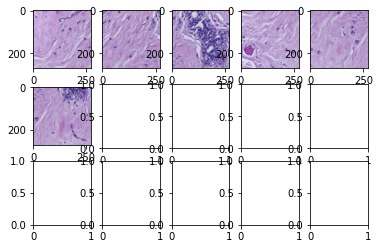

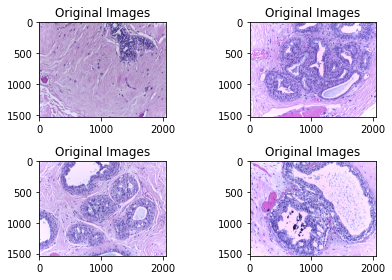

In [59]:
crop(BACHDataset)
print_imgs(BACHDataset)

In [100]:
img = np.array(dataset[0][0])
print(img.shape)

(224, 224, 3)


In [10]:
print(img[:-1, :, :].shape)


(223, 224, 3)
